In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
from numpy.linalg import inv
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from numpy import expand_dims
from tensorflow.keras.utils import load_img, img_to_array
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from matplotlib.colors import ListedColormap
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
def image_array(name):
    img = load_img(name)
    img_array = img_to_array(img)
    return img_array

In [10]:
def block_img(img_name):
  img = image_array(img_name)
  h = 8
  w = 8
  feature = []
  for a in range(0, (img.shape[0]-h)+1, h):
    for b in range(0, (img.shape[1]-w)+1, w):
      block = img[a:a+h, b:b+w]
      my_block = (block.flatten())
      feature.append(my_block)
  return feature

In [11]:
cat1, cat2, dog1, dog2 = block_img('cat1.jpg'), block_img('cat2.jpg'),\
      block_img('dog1.jpg'), block_img('dog2.jpg')

In [12]:
df1, df2, df3, df4 = pd.DataFrame(cat1), pd.DataFrame(cat2),\
pd.DataFrame(dog1), pd.DataFrame(dog2)

In [13]:
df1['label'], df2['label'] =0,0
df3['label'], df4['label'] = 1,1

In [14]:
df = pd.concat([df1, df2, df3, df4], axis =0)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,label
0,228.0,183.0,180.0,181.0,136.0,133.0,184.0,139.0,136.0,188.0,...,104.0,59.0,53.0,101.0,56.0,50.0,110.0,65.0,59.0,0
1,182.0,137.0,134.0,182.0,137.0,134.0,182.0,137.0,134.0,181.0,...,108.0,63.0,57.0,112.0,67.0,61.0,115.0,70.0,64.0,0
2,174.0,137.0,131.0,175.0,138.0,132.0,176.0,139.0,133.0,178.0,...,110.0,70.0,62.0,112.0,72.0,64.0,114.0,74.0,66.0,0
3,178.0,141.0,135.0,178.0,141.0,135.0,178.0,141.0,135.0,177.0,...,111.0,71.0,63.0,111.0,71.0,63.0,111.0,71.0,63.0,0
4,175.0,138.0,129.0,174.0,137.0,128.0,170.0,133.0,124.0,162.0,...,106.0,66.0,56.0,109.0,69.0,59.0,110.0,70.0,60.0,0


Text(0, 0.5, '35th feature')

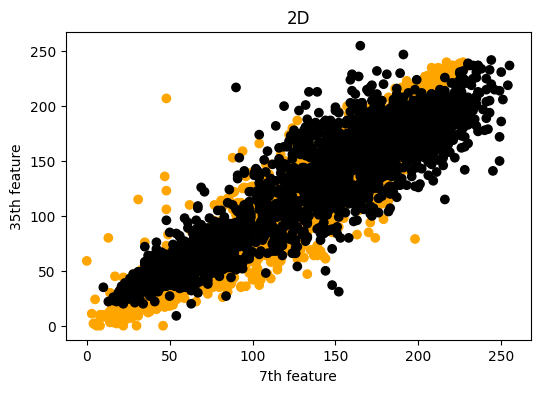

In [15]:
#Plotting 2D for ds
x = df[7]
y = df[35]
label = df["label"]
color = ['orange', 'black']
fig = plt.figure(figsize=(6,4))
plt.scatter(x, y, c=label, cmap=matplotlib.colors.ListedColormap(color))
plt.title("2D")
plt.xlabel("7th feature")
plt.ylabel("35th feature")

In [16]:
def checker(df):
    if df.isnull().sum().sum()==0:
        print("Full data")
    if df.shape[1]<df.shape[0]:
        print("Low dimensional")
    a = df.describe()
    if np.max(a[a.index=='mean'].values)-np.min(a[a.index=='mean'].values)>100:
        print("Scale problem")
checker(df)

Full data
Low dimensional
Scale problem


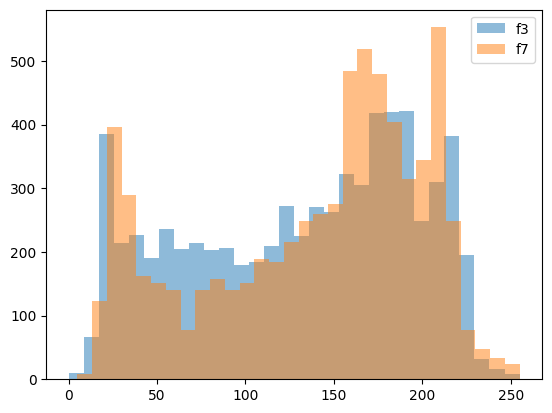

In [17]:
f3 = [df[7]]
f7 = [df[9]]
plt.hist(f3, alpha=0.5, label='f3', bins=30)
plt.hist(f7, alpha=0.5, label='f7', bins=30)
plt.legend(loc='upper right')
plt.show()

In [18]:
import plotly.graph_objects as go

# Data
f3 = df[7]
f7 = df[9]

# Create histogram traces
trace_f3 = go.Histogram(
    x=f3,
    name='f3',
    opacity=0.5,
    nbinsx=30
)
trace_f7 = go.Histogram(
    x=f7,
    name='f7',
    opacity=0.5,
    nbinsx=30
)

# Create layout
layout = go.Layout(
    title='Histogram of f3 and f7',
    xaxis=dict(title='Values'),
    yaxis=dict(title='Frequency'),
    barmode='overlay'
)

# Create figure
fig = go.Figure(data=[trace_f3, trace_f7], layout=layout)

# Display the figure
fig.show()

,count,mean,std,min,25%,50%,75%,max
0,6844.0,139.355194,62.431911,2.0,94.00,157.0,189.0,255.0
1,6844.0,131.743134,64.089546,0.0,76.00,144.0,186.0,255.0
2,6844.0,125.504822,66.977173,0.0,62.00,134.0,181.0,248.0
3,6844.0,138.773087,62.074692,1.0,93.00,157.0,187.0,255.0
4,6844.0,131.146698,63.846725,0.0,75.75,143.0,185.0,253.0
...,...,...,...,...,...,...,...,...
188,6844.0,124.821739,66.063004,0.0,63.00,130.0,179.0,248.0
189,6844.0,138.778061,61.276466,2.0,96.00,156.0,186.0,255.0
190,6844.0,130.989487,63.121399,0.0,77.00,141.0,184.0,255.0
191,6844.0,124.832115,66.218399,0.0,63.75,130.0,180.0,248.0


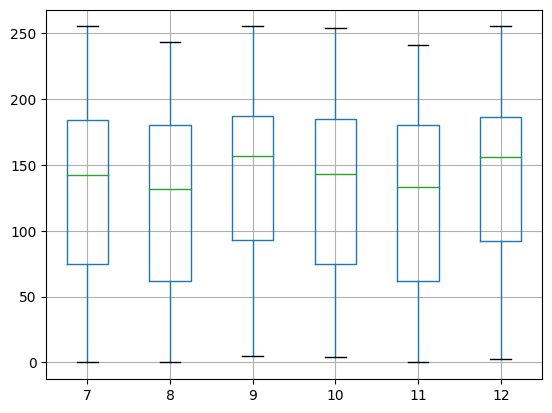

In [19]:
df.boxplot(column = [7,8,9,10,11,12])
df.describe().T

In [20]:
import plotly.graph_objects as go

# Select the desired columns
columns = [7, 8, 9, 10, 11, 12]

# Create box plot traces
traces = []
for column in columns:
    trace = go.Box(
        y=df[column],
        name=f'Column {column}',
        boxpoints='all',
        jitter=0.5,
        whiskerwidth=0.2,
        marker=dict(size=2),
        line=dict(width=1)
    )
    traces.append(trace)

# Create layout
layout = go.Layout(
    title='Box Plot',
    yaxis=dict(title='Values')
)

# Create figure
fig = go.Figure(data=traces, layout=layout)

# Display the figure
fig.show()

In [21]:
def scaling(df):
    X = df.iloc[:, 0:192].values
    y = df.iloc[:, 192].values

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=0, shuffle = True)
        
    my_scaler = preprocessing.StandardScaler()

    X_train_std = my_scaler.fit_transform(X_train)
    X_test_std = my_scaler.fit_transform(X_test)
    return X_train_std, X_test_std,  y_train, y_test

In [22]:
X_train_std, X_test_std,  y_train, y_test = scaling(df)

In [23]:
def lr_lda(df):
    X_train_std, X_test_std,  y_train, y_test = scaling(df)
    lr_normal = LogisticRegression()
    lr_normal = lr_normal.fit(X_train_std, y_train)
    pred_normal=lr_normal.predict(X_test_std)
    print ("Classification Report")
    print(classification_report(y_test, pred_normal))
    print ("Confusion Report")
    print(confusion_matrix(y_test, pred_normal))
    return lr_normal, pred_normal

In [24]:
lr_normal, pred_normal = lr_lda(df)

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       836
           1       0.86      0.86      0.86       875

    accuracy                           0.86      1711
   macro avg       0.86      0.86      0.86      1711
weighted avg       0.86      0.86      0.86      1711

Confusion Report
[[718 118]
 [122 753]]


c:\Users\Etibar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


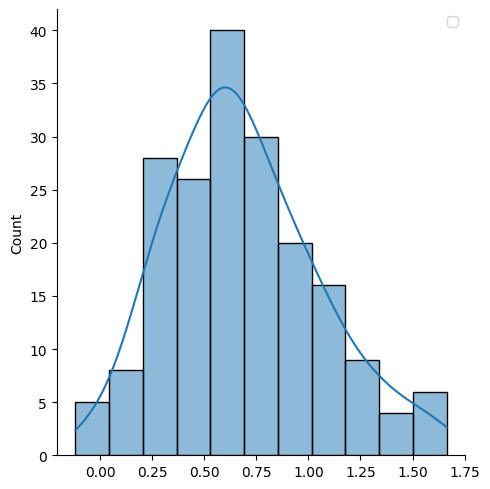

In [25]:
sns.displot(X_train_std[3], kde = True)
plt.legend(loc='upper right')
plt.show()

In [26]:
covMatrix_train = np.cov(y_train,bias=True)
covMatrix_test = np.cov(X_test_std, bias = True)
print(covMatrix_train)

0.24994662719755045


In [27]:
X_train_std, X_test_std,  y_train, y_test = scaling(df)
X_train_std

array([[-0.43467534, -0.254906  , -0.2535043 , ...,  0.7964303 ,
         0.7395434 ,  0.42130023],
       [-0.16041698, -0.5378206 , -0.7648079 , ..., -0.17064196,
        -0.54829687, -0.74609643],
       [ 0.74302226,  0.65670747,  0.39314437, ...,  0.12439702,
         0.0876736 ,  0.1938853 ],
       ...,
       [-0.33787826, -0.85217005, -0.9903831 , ..., -0.35094357,
        -0.6595917 , -0.8673844 ],
       [-1.7575686 , -1.7952186 , -1.7122235 , ..., -1.8261385 ,
        -1.7884393 , -1.7164001 ],
       [-0.9509264 , -1.0564972 , -1.1106898 , ...,  0.58334655,
         0.21486771,  0.26969028]], dtype=float32)

In [28]:
def LDA(df):
    X_train_std, X_test_std,  y_train, y_test = scaling(df)
    n_components = min(X_train_std.shape[1], len(np.unique(y_train))) - 1
    lda = LinearDiscriminantAnalysis(n_components=n_components)
    X_train_LDA = lda.fit_transform(X_train_std, y_train)
    X_test_LDA = lda.fit_transform(X_test_std, y_test)

    lr_lda = LogisticRegression()
    lr_lda = lr_lda.fit(X_train_LDA, y_train)

    pred_lda=lr_lda.predict(X_test_LDA)
    print ("Classification Report")
    print(classification_report(y_test, pred_lda))
    print ("Confusion Report")
    print(confusion_matrix(y_test, pred_lda))
    return pred_lda

In [29]:
pred_lda = LDA(df)

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       836
           1       0.90      0.88      0.89       875

    accuracy                           0.89      1711
   macro avg       0.89      0.89      0.89      1711
weighted avg       0.89      0.89      0.89      1711

Confusion Report
[[750  86]
 [106 769]]


In [30]:
def LogisticRegression_PCA(df):
    X_train_std, X_test_std,  y_train, y_test = scaling(df)

    pca = PCA(n_components= 2) 
    X_train_PCA = pca.fit_transform(X_train_std)
    X_test_PCA = pca.transform(X_test_std)

    log_r1 = LogisticRegression()
    log_r1.fit(X_train_PCA, y_train)

    pred1=log_r1.predict(X_test_PCA)

    print ("Classification Report")
    print(classification_report(y_test, pred1))

    print ("Confusion Report")
    print(confusion_matrix(y_test, pred1))

    print(pca.explained_variance_ratio_)
    return pred1

In [31]:
pred1 = LogisticRegression_PCA(df)

Classification Report
              precision    recall  f1-score   support

           0       0.54      0.53      0.53       836
           1       0.56      0.56      0.56       875

    accuracy                           0.55      1711
   macro avg       0.55      0.55      0.55      1711
weighted avg       0.55      0.55      0.55      1711

Confusion Report
[[444 392]
 [384 491]]
[0.9109302 0.0292822]


In [32]:
def PCA_LDA_Random(df):
    X_train_std, X_test_std,  y_train, y_test = scaling(df)

    pipeline = Pipeline([('pca', PCA(n_components= 2)), ('clf',  RandomForestRegressor(n_estimators=20,random_state=42))])
    pipeline.fit(X_train_std, y_train)
    print('Test Accuracy: %.3f' %pipeline.score(X_test_std, y_test))

    n_components = min(X_train_std.shape[1], len(np.unique(y_train))) - 1
    
    pipeline2 = Pipeline([('pca', LinearDiscriminantAnalysis(n_components= n_components)), \
                         ('clf', RandomForestRegressor(n_estimators = 20, random_state=42))])

    pipeline2.fit(X_train_std, y_train)
    print('Test Accuracy: %.3f' %pipeline2.score(X_test_std, y_test))
    

In [33]:
PCA_LDA_Random(df)

Test Accuracy: 0.491
Test Accuracy: 0.364


In [34]:


def Sequential_Model(df):
    X_train_std, X_test_std, y_train, y_test = scaling(df)

    classifier = Sequential()
    classifier.add(Dense(units=800, kernel_initializer='uniform', activation='relu', input_shape=(192,)))
    classifier.add(Dense(units=600, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=400, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=2, kernel_initializer='uniform', activation='sigmoid'))

    optimizer = tf.keras.optimizers.SGD()
    classifier.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])
    classifier.fit(X_train_std, y_train, epochs=10, batch_size=32)

    predictions = classifier.predict(X_test_std)
    prediction = tf.argmax(predictions, axis=1)

    CC_test = tf.math.confusion_matrix(y_test, prediction)
    TN = CC_test[1, 1]
    FP = CC_test[1, 0]
    FN = CC_test[0, 1]
    TP = CC_test[0, 0]
    FPFN = FP + FN
    TPTN = TP + TN
    Accuracy = 1 / (1 + (FPFN / TPTN))
    print("Our_Accuracy_Score:", Accuracy)
    Precision = 1 / (1 + (FP / TP))
    print("Our_Precision_Score:", Precision)
    Sensitivity = 1 / (1 + (FN / TP))
    print("Our_Sensitivity_Score:", Sensitivity)
    Specificity = 1 / (1 + (FP / TN))
    print("Our_Specificity_Score:", Specificity)

    return prediction


In [35]:
Sequential_Model(df)

Epoch 1/10
161/161 [==============================] - 2s 8ms/step - loss: 0.2483 - accuracy: 0.4849
Epoch 2/10
161/161 [==============================] - 1s 8ms/step - loss: 0.2458 - accuracy: 0.4769
Epoch 3/10
161/161 [==============================] - 1s 8ms/step - loss: 0.2435 - accuracy: 0.4668
Epoch 4/10
161/161 [==============================] - 1s 8ms/step - loss: 0.2407 - accuracy: 0.4422
Epoch 5/10
161/161 [==============================] - 1s 8ms/step - loss: 0.2373 - accuracy: 0.3920
Epoch 6/10
161/161 [==============================] - 1s 8ms/step - loss: 0.2330 - accuracy: 0.3405
Epoch 7/10
161/161 [==============================] - 1s 8ms/step - loss: 0.2276 - accuracy: 0.3559
Epoch 8/10
161/161 [==============================] - 1s 8ms/step - loss: 0.2210 - accuracy: 0.3542
Epoch 9/10
161/161 [==============================] - 1s 8ms/step - loss: 0.2129 - accuracy: 0.3618
Epoch 10/10
54/54 [==============================] - 0s 4ms/step
Our_Accuracy_Score: tf.Tensor(0.415

<tf.Tensor: shape=(1711,), dtype=int64, numpy=array([1, 0, 1, ..., 0, 0, 1], dtype=int64)>